# Pre-processing

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from confusion import cm_analysis
from sklearn import metrics
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
colours = ListedColormap(['r','b','g'])
from termcolor import colored

### Reading the data.

In [2]:
dataset = pd.read_csv('heart.csv')
# drop row_name column
dataset.drop(columns=['row.names'],inplace=True)

### One-hot encode the cateogorical variables.

In [3]:
# apply hotencoding
dataset_transformed = pd.get_dummies(dataset, prefix='famhist')

### Exploratory Data Analysis (EDA)

<Figure size 432x288 with 0 Axes>

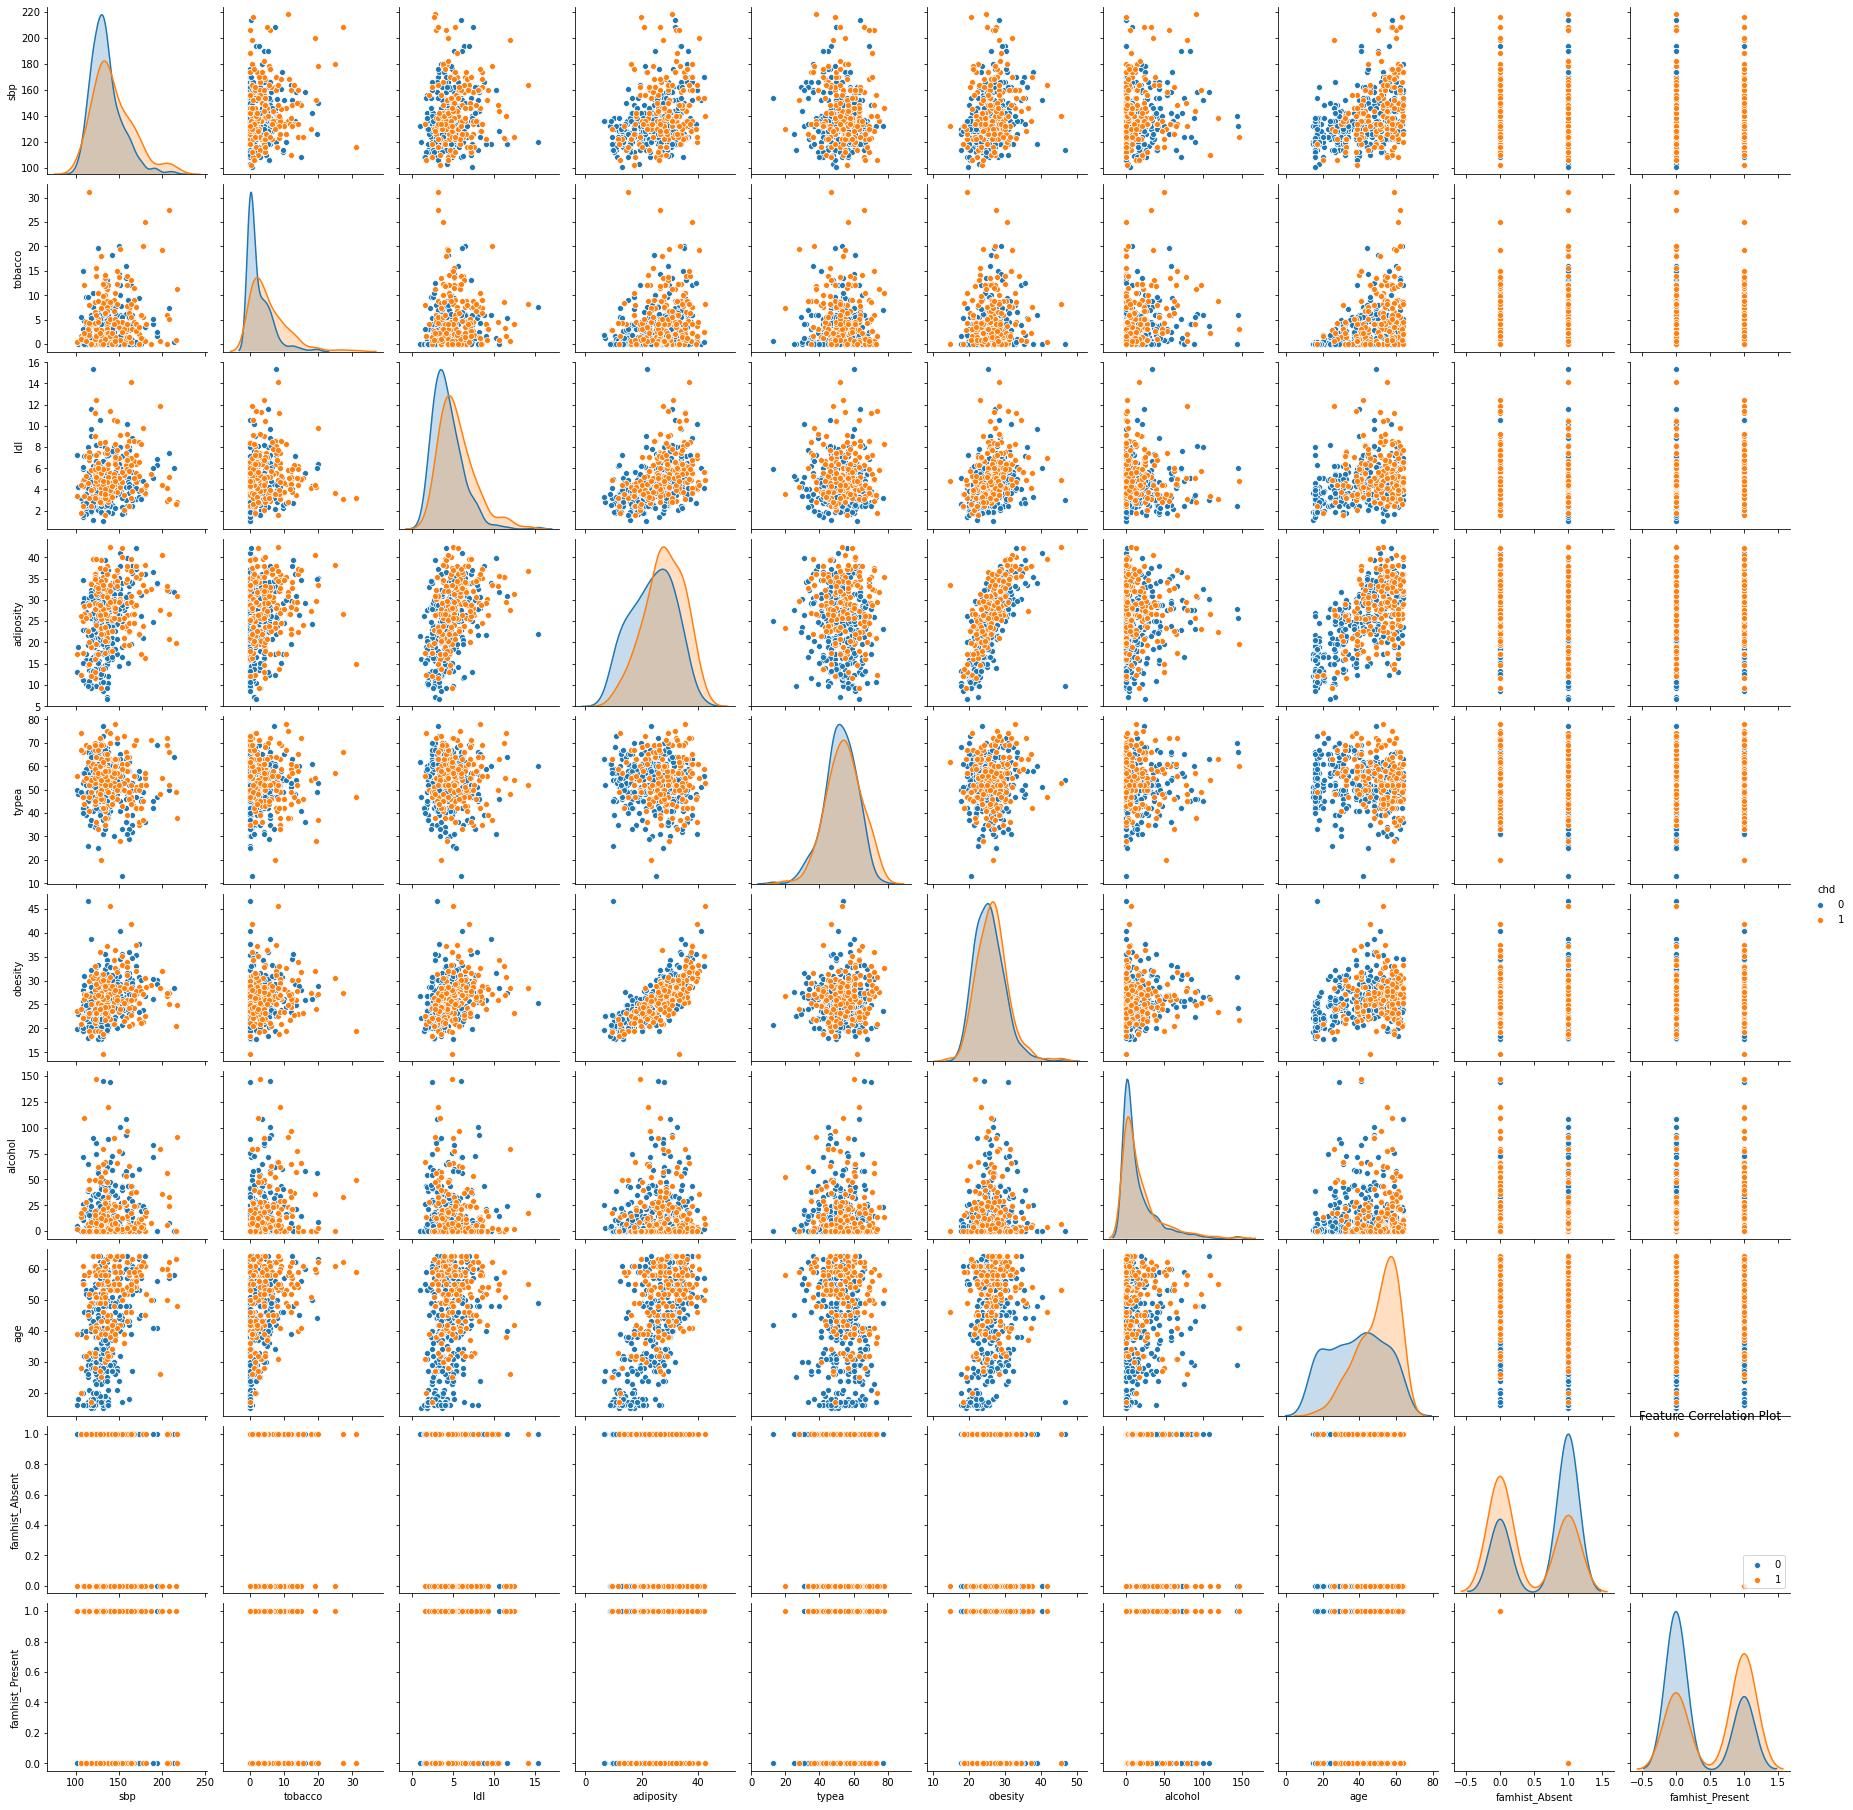

In [4]:
plt.figure()
sns.pairplot(dataset_transformed, hue="chd", height=2.5)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Correlation Plot')
plt.legend(loc="lower right")
# plt.show()
plt.savefig('pair_plot')

### Splitting and Scaling the Data.

In [5]:
dataset_transformed_X = dataset_transformed.drop(columns=['chd'])
dataset_transformed_y = dataset_transformed['chd']

# Scaling feature values.
sc = StandardScaler()
dataset_transformed_X = sc.fit_transform(dataset_transformed_X)

# Train, test split.

X_train, X_test, y_train, y_test = train_test_split(dataset_transformed_X, dataset_transformed_y, test_size=0.2, random_state=42, shuffle=True)

# Logistic Regression

### Training the data using Logistic Regression.

In [6]:
classifier = LogisticRegression(penalty='l2', random_state = 42, C=1e5)
classifier.fit(X_train, y_train)

LogisticRegression(C=100000.0, random_state=42)

### Testing the model, making predictions.

In [7]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)[::,1]

### Calculating accuracy of model.

In [8]:
def find_accuracy(y, y_pred, val):
    from sklearn.metrics import accuracy_score
    acc= accuracy_score(y, y_pred)*100
    
    # accuracies['Logistic Regression'] = acc
    print(val, "Accuracy {:.2f}%".format(acc))

In [9]:
find_accuracy(y_test, y_pred, 'Model')

Model Accuracy 78.49%


## Calculating PCA components.

In [10]:
pca = PCA(n_components=10, whiten = True)
X_PCA = pca.fit_transform(dataset_transformed_X)

In [11]:
print (colored ("PCA Components:", 'red'))
print(pca.components_)
print (colored ("PCA Explained Variance:", 'red'))
print(pca.explained_variance_)
print (colored ("PCA Singular Values:", 'red'))
print(pca.singular_values_)
print (colored ("PCA Explained Variance Ratio:", 'red'))
print(pca.explained_variance_ratio_)

PCA Components:
[[ 2.88227292e-01  2.71578177e-01  3.11340645e-01  4.68421613e-01
  -5.66309361e-03  3.59341621e-01  1.17723216e-01  4.30634345e-01
  -3.14924873e-01  3.14924873e-01]
 [-1.95447444e-01 -1.52351299e-01 -1.05775869e-01 -2.51561640e-01
   9.72812352e-02 -2.26264199e-01 -2.20357448e-03 -1.46818357e-01
  -6.25259136e-01  6.25259136e-01]
 [ 2.38700013e-01  4.58629866e-01 -3.63918894e-01 -1.87255701e-01
  -2.82914906e-01 -3.91571275e-01  5.42676284e-01  1.93164133e-01
   4.75328013e-04 -4.75328013e-04]
 [-4.97408773e-02  1.02215818e-01 -2.11455327e-02 -1.74612967e-02
   8.21956555e-01  1.45269620e-01  5.06574762e-01 -1.63093156e-01
   5.65355377e-02 -5.65355377e-02]
 [-2.84612549e-01  6.01049946e-01  2.94145640e-01 -1.50485301e-01
   2.81934089e-01 -3.55747713e-01 -4.30418639e-01  2.33737861e-01
   3.62651176e-02 -3.62651176e-02]
 [ 7.78503316e-01 -1.29696167e-01 -2.22453215e-01 -1.26603895e-01
   3.46828995e-01 -1.64653184e-01 -3.94997590e-01  8.80637648e-02
  -1.44597124e-02

## Plotting PCA Components with all PCs

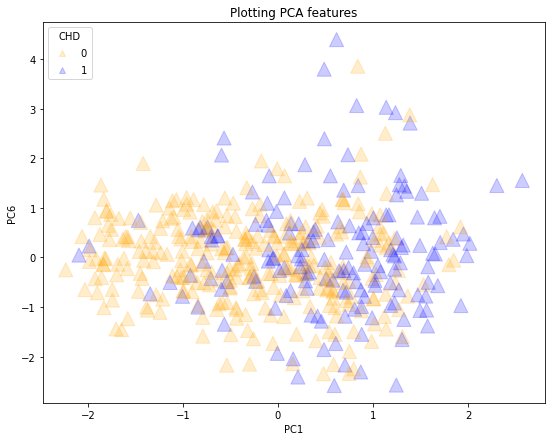

In [12]:
fig, ax = plt.subplots(figsize=(9, 7))
#Change the PCA value to plot PCs against each other
scatter = ax.scatter(X_PCA[:,0], X_PCA[:,5], c=dataset_transformed["chd"], marker='^', s=200, alpha=0.2, cmap=ListedColormap(['orange','blue']))
legend1 = ax.legend(*scatter.legend_elements(num=1),
                    loc="upper left", title="CHD")

plt.xlabel('PC1')
plt.ylabel('PC6');
plt.title('Plotting PCA features')
plt.savefig('pca_features')

### Scree Plot of all PCAs

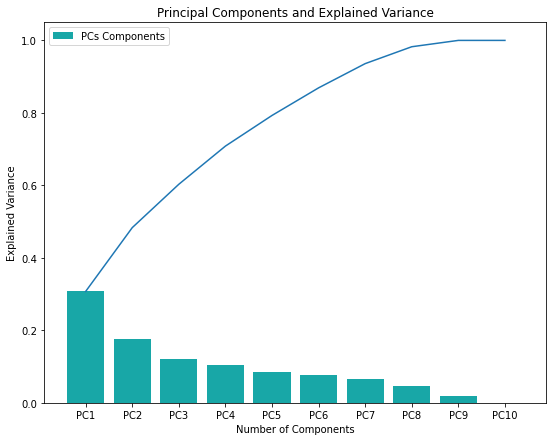

In [13]:
plt.figure(figsize=(9, 7))
df = pd.DataFrame({'var':sorted(pca.explained_variance_ratio_, reverse=True),
             'PC':["PC"+str(i+1) for i in range(0,10)]})
sns.barplot(x='PC',y="var", 
           data=df, color="c", label="PCs Components");
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance');
plt.title('Principal Components and Explained Variance')
plt.plot(np.cumsum(sorted(pca.explained_variance_ratio_, reverse=True)))
plt.legend()
plt.savefig('pca_explained_variance')

### Splitting the dataset with all PCs

In [14]:
dataset_pca = pd.DataFrame(X_PCA)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(dataset_pca, dataset_transformed_y, test_size=0.2, random_state=42, shuffle=True)

## Training a Logistic Regression Model with all PCs

In [15]:
classifier_pca = LogisticRegression(penalty='l2', random_state = 42, C=1e5)
classifier_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(C=100000.0, random_state=42)

## Testing the model, making predictions.

In [16]:
y_pred_pca = classifier_pca.predict(X_test_pca)
y_pred_proba_pca = classifier_pca.predict_proba(X_test_pca)[::,1]

In [17]:
find_accuracy(y_test_pca, y_pred_pca, 'Model')

Model Accuracy 75.27%


## Variance of 90% explained by first 7 PCs.

In [18]:
New_PCA = pd.DataFrame(pca.explained_variance_ratio_)
variance_list = New_PCA.rename_axis('ID').values
print (variance_list)
variance_of_ninety_percent = sum(variance_list[0:7])
print(variance_of_ninety_percent)
variance_of_two_PCs = sum(variance_list[0:2])
print (variance_of_two_PCs)

[[3.07351880e-01]
 [1.75981159e-01]
 [1.19713113e-01]
 [1.05306112e-01]
 [8.45566492e-02]
 [7.61562175e-02]
 [6.68583573e-02]
 [4.65879217e-02]
 [1.74885896e-02]
 [4.20297597e-33]]
[0.93592349]
[0.48333304]


### Fit new PCA with n_components = 7.

In [19]:
pca = PCA(n_components=7, whiten = True)
X_PCA = pca.fit_transform(dataset_transformed_X)

## Plotting PCA Components with top 90% variance, up to PC7.

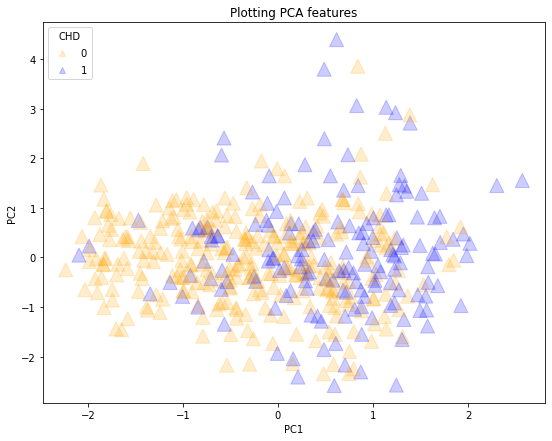

In [28]:
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(X_PCA[:,0], X_PCA[:,5], c=dataset_transformed["chd"], marker='^', s=200, alpha=0.2, cmap=ListedColormap(['orange','blue']))
legend1 = ax.legend(*scatter.legend_elements(num=1),
                    loc="upper left", title="CHD")

plt.xlabel('PC1')
plt.ylabel('PC2');
plt.title('Plotting PCA features')
plt.savefig('pca_features')

### Scree Plot of top 90% variance PCs.

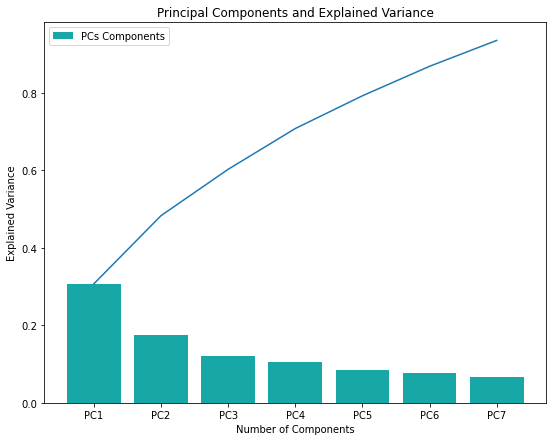

In [21]:
plt.figure(figsize=(9, 7))
df = pd.DataFrame({'var':sorted(pca.explained_variance_ratio_, reverse=True),
             'PC':["PC"+str(i+1) for i in range(0,7)]})
sns.barplot(x='PC',y="var", 
           data=df, color="c", label="PCs Components");
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance');
plt.title('Principal Components and Explained Variance')
plt.plot(np.cumsum(sorted(pca.explained_variance_ratio_, reverse=True)))
plt.legend()
plt.savefig('pca_explained_variance')

### Splitting the dataset with top 7 PCs.

In [22]:
dataset_pca1 = pd.DataFrame(X_PCA)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(dataset_pca1, dataset_transformed_y, test_size=0.2, random_state=42, shuffle=True)

## Training Logistic Regression with & PCs.

In [23]:
classifier_pca = LogisticRegression(penalty='l2', random_state = 42, C=1e5)
classifier_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(C=100000.0, random_state=42)

## Testing new model, making predictions.

In [24]:
y_pred_pca = classifier_pca.predict(X_test_pca)
y_pred_proba_pca = classifier_pca.predict_proba(X_test_pca)[::,1]

In [25]:
find_accuracy(y_test_pca, y_pred_pca, 'Model')

Model Accuracy 75.27%
